In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm

In [2]:
smd = pd.read_csv("Salary_MD.csv")
smd.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1.0,Software Engineer,5.0,90000,UK,White,0
1,28,Female,2.0,Data Analyst,3.0,65000,USA,NaN,0
2,45,Male,3.0,Manager,15.0,150000,Canada,White,1
3,36,Female,1.0,Sales Associate,7.0,60000,USA,Hispanic,0
4,52,Male,2.0,Director,20.0,200000,USA,Asian,0


In [3]:
smd.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6661.000000,6684.000000,6.684000e+03,6684.000000
mean,33.147816,1.623480,8.161655,1.164338e+05,0.143477
std,8.619754,0.880016,7.356860,6.738536e+04,0.350585
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,28.000000,1.000000,3.000000,7.000000e+04,0.000000
50%,32.000000,1.000000,7.000000,1.150000e+05,0.000000
75%,38.000000,2.000000,12.000000,1.600000e+05,0.000000
max,110.000000,3.000000,200.000000,2.159320e+06,1.000000


In [4]:
smd.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
6679,49,Female,3.0,Director of Marketing,20.0,200000,UK,Mixed,0
6680,32,Male,0.0,Sales Associate,3.0,50000,Australia,Australian,0
6681,30,Female,1.0,Financial Manager,4.0,55000,China,Chinese,0
6682,46,Male,2.0,Marketing Manager,14.0,140000,China,Korean,0
6683,26,Female,0.0,Sales Executive,1.0,35000,Canada,Black,0


In [5]:
print("Columnas y Tipos de Datos:")
print(smd.dtypes)

Columnas y Tipos de Datos:
Age                      int64
Gender                  object
Education Level        float64
Job Title               object
Years of Experience    float64
Salary                   int64
Country                 object
Race                    object
Senior                   int64
dtype: object


In [6]:
categorical_vars = smd.select_dtypes(include=["object", "category"]).columns.tolist()
print("Variables categóricas:", categorical_vars)

Variables categóricas: ['Gender', 'Job Title', 'Country', 'Race']


In [7]:
print("\nInformación del DataFrame:")
print(smd.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   int64  
 1   Gender               6613 non-null   object 
 2   Education Level      6661 non-null   float64
 3   Job Title            6644 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6660 non-null   object 
 7   Race                 6521 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 470.1+ KB
None


In [8]:
print("\nValores nulos en cada columna:")
print(smd.isnull().sum())


Valores nulos en cada columna:
Age                      0
Gender                  71
Education Level         23
Job Title               40
Years of Experience      0
Salary                   0
Country                 24
Race                   163
Senior                   0
dtype: int64


In [9]:
print(smd["Job Title"].value_counts())

Job Title
Software Engineer                 804
Data Scientist                    511
Data Analyst                      387
Software Engineer Manager         376
Product Manager                   320
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: count, Length: 129, dtype: int64


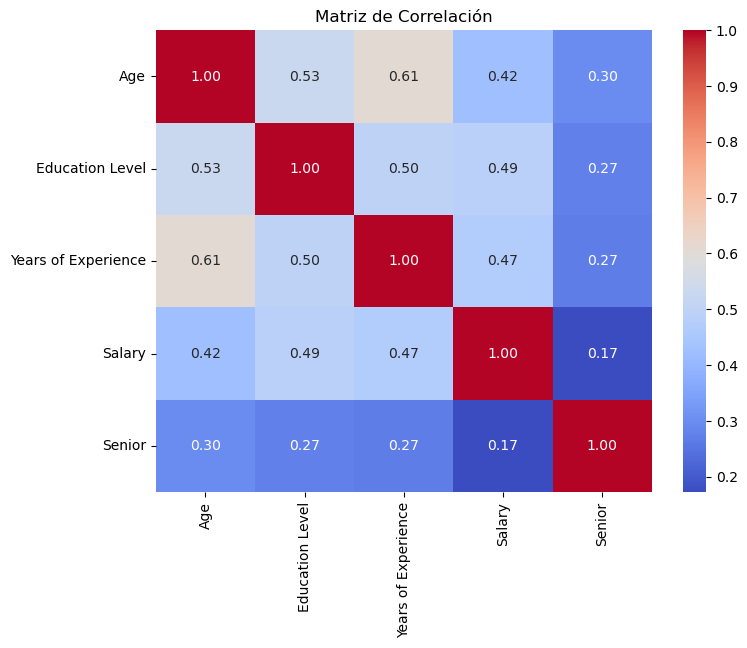

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = smd.select_dtypes(include=["number"]).corr()

# Graficar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [11]:
import numpy as np
import scipy.stats as stats

def cramers_v(x, y):
    """Calcula el coeficiente de Cramér entre dos variables categóricas"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

categorical_vars = ['Gender', 'Job Title', 'Country', 'Race'] 

for cat_var in categorical_vars:
    for other_cat in categorical_vars:
        if cat_var != other_cat:
            print(f"Cramér V entre {cat_var} y {other_cat}: {cramers_v(smd[cat_var], smd[other_cat])}")

Cramér V entre Gender y Job Title: 0.4216423115889322
Cramér V entre Gender y Country: 0.01674418926433746
Cramér V entre Gender y Race: 0.029622136587382792
Cramér V entre Job Title y Gender: 0.4216423115889322
Cramér V entre Job Title y Country: 0.14023761524984724
Cramér V entre Job Title y Race: 0.14519461425332153
Cramér V entre Country y Gender: 0.01674418926433746
Cramér V entre Country y Job Title: 0.14023761524984724
Cramér V entre Country y Race: 0.6973382686664525
Cramér V entre Race y Gender: 0.029622136587382792
Cramér V entre Race y Job Title: 0.14519461425332153
Cramér V entre Race y Country: 0.6973382686664525


In [12]:
missing_values = smd.isnull().sum()  # Cantidad de valores nulos por columna
missing_percentage = (missing_values / len(smd)) * 100  # Porcentaje de valores nulos

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0]  # Solo mostrar columnas con nulos
print(missing_df)

                 Missing Values  Percentage
Gender                       71    1.062238
Education Level              23    0.344105
Job Title                    40    0.598444
Country                      24    0.359066
Race                        163    2.438659


In [13]:
smd['Missing Count'] = smd.isnull().sum(axis=1)
print(smd['Missing Count'].value_counts())

Missing Count
0    6461
1     161
2      32
3      24
4       6
Name: count, dtype: int64


In [14]:
missing_values = smd.isnull().sum()
missing_percentage = (missing_values / len(smd)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0]  # Solo mostrar columnas con nulos
print(missing_df)

# Imputar valores nulos en 'Gender' por la moda dentro de cada grupo de 'Job Title'
smd['Gender'] = smd['Gender'].fillna(
    smd.groupby('Job Title')['Gender'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
)
smd['Gender'] = smd['Gender'].fillna('Unknown')

                 Missing Values  Percentage
Gender                       71    1.062238
Education Level              23    0.344105
Job Title                    40    0.598444
Country                      24    0.359066
Race                        163    2.438659


In [15]:
print(smd[smd['Gender'].isnull()]['Salary'].describe())

# Ver proporción de valores nulos en Salary cuando Gender es nulo
null_gender_salary_nulls = smd[smd['Gender'].isnull()]['Salary'].isnull().sum()
total_null_gender = smd['Gender'].isnull().sum()

print(f"Registros con Gender nulo y Salary nulo: {null_gender_salary_nulls} de {total_null_gender}")

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Salary, dtype: float64
Registros con Gender nulo y Salary nulo: 0 de 0


In [16]:
# Identificar outliers utilizando Z-Score y IQR
numeric_vars = smd.select_dtypes(include=["float64", "int64"])

# Identificación de outliers usando Z-Score
from scipy import stats

outliers_z = {}
for col in numeric_vars.columns:
    z_scores = np.abs(stats.zscore(numeric_vars[col], nan_policy='omit'))
    outliers_z[col] = np.sum(z_scores > 3)  # Consideramos outliers aquellos con Z-Score > 3

# Identificación de outliers usando el método IQR
outliers_iqr = {}
for col in numeric_vars.columns:
    Q1 = numeric_vars[col].quantile(0.25)
    Q3 = numeric_vars[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[col] = np.sum((numeric_vars[col] < lower_bound) | (numeric_vars[col] > upper_bound))

# Tratar outliers en 'Salary' y 'Years of Experience' usando IQR
Q1_salary = smd['Salary'].quantile(0.25)
Q3_salary = smd['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary
lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary
smd['Salary'] = smd['Salary'].clip(lower_bound_salary, upper_bound_salary)

Q1_experience = smd['Years of Experience'].quantile(0.25)
Q3_experience = smd['Years of Experience'].quantile(0.75)
IQR_experience = Q3_experience - Q1_experience
lower_bound_experience = Q1_experience - 1.5 * IQR_experience
upper_bound_experience = Q3_experience + 1.5 * IQR_experience
smd['Years of Experience'] = smd['Years of Experience'].clip(lower_bound_experience, upper_bound_experience)

In [17]:
smd['Job Level'] = pd.cut(smd['Years of Experience'], bins=[0, 2, 5, 10, 20], labels=['Junior', 'Mid', 'Senior', 'Expert'])

# Estandarización de variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
smd[['Salary', 'Years of Experience']] = scaler.fit_transform(smd[['Salary', 'Years of Experience']])

# Codificación de variables categóricas
smd['Job Title'] = smd['Job Title'].str.lower().str.strip()
smd = pd.get_dummies(smd, columns=['Job Title', 'Job Level'], drop_first=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

# Codificar las variables categóricas: Gender, Country, Race
le = LabelEncoder()
smd['Gender'] = le.fit_transform(smd['Gender'])
smd['Country'] = le.fit_transform(smd['Country'].fillna('Unknown'))  # Imputar nulos antes de codificar
smd['Race'] = le.fit_transform(smd['Race'].fillna('Unknown'))  # Imputar nulos antes de codificar

# Asegúrate de que todas las columnas en X sean numéricas
# Seleccionar todas las columnas de X (predictoras) excepto 'Salary' (que es la variable objetivo)
X = smd.drop(columns=['Salary'])

# Convertir cualquier valor no numérico a NaN y luego imputar esos valores
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  # Opción para rellenar NaN con 0

# Variable objetivo 'Salary' (sin modificaciones)
y = smd['Salary']

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² del modelo de regresión lineal: {r2}")

R² del modelo de regresión lineal: 0.8011195646147763


In [19]:
# Codificar las variables categóricas: Gender, Country, Race
le = LabelEncoder()
smd['Gender'] = le.fit_transform(smd['Gender'])
smd['Country'] = le.fit_transform(smd['Country'].fillna('Unknown'))  # Imputar nulos antes de codificar
smd['Race'] = le.fit_transform(smd['Race'].fillna('Unknown'))  # Imputar nulos antes de codificar

# Asegúrate de que todas las columnas en X sean numéricas
# Seleccionar todas las columnas de X (predictoras) excepto 'Salary' (que es la variable objetivo)
X = smd.drop(columns=['Salary'])

# Convertir cualquier valor no numérico a NaN y luego imputar esos valores
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  # Opción para rellenar NaN con 0

# Variable objetivo 'Salary' (sin modificaciones)
y = smd['Salary']

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² del modelo de regresión lineal: {r2}")


R² del modelo de regresión lineal: 0.8011195646147763


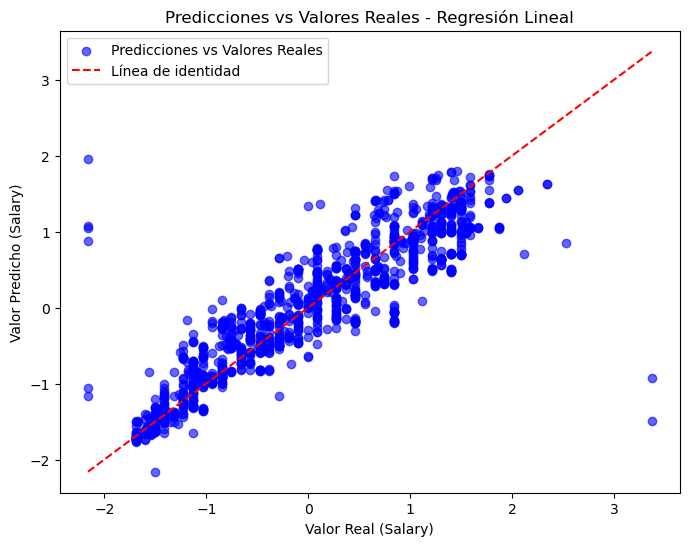

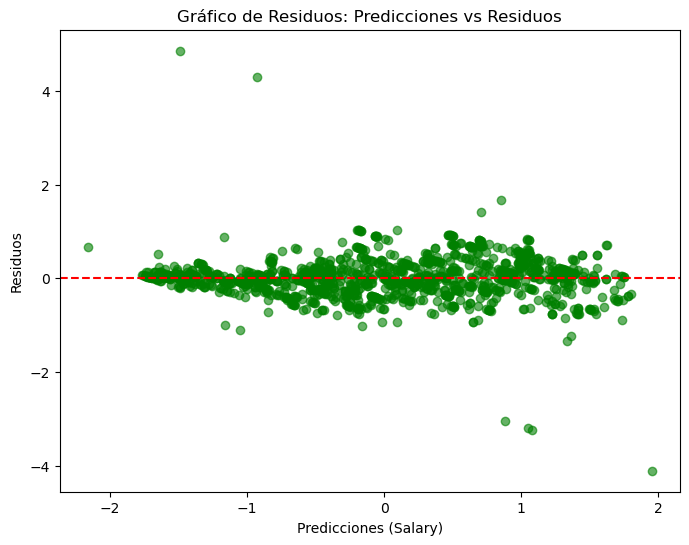

In [20]:
import matplotlib.pyplot as plt

# Predecir sobre el conjunto de prueba usando todas las características (no solo una variable)
y_pred_all = model.predict(X_test)

# Gráfico de dispersión con los valores reales y la línea de predicción
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_all, color='blue', alpha=0.6, label="Predicciones vs Valores Reales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Línea de identidad")
plt.title("Predicciones vs Valores Reales - Regresión Lineal")
plt.xlabel("Valor Real (Salary)")
plt.ylabel("Valor Predicho (Salary)")
plt.legend()
plt.show()

# Gráfico de los residuos (diferencia entre valores reales y predicciones)
residuals_all = y_test - y_pred_all

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_all, residuals_all, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de Residuos: Predicciones vs Residuos")
plt.xlabel("Predicciones (Salary)")
plt.ylabel("Residuos")
plt.show()

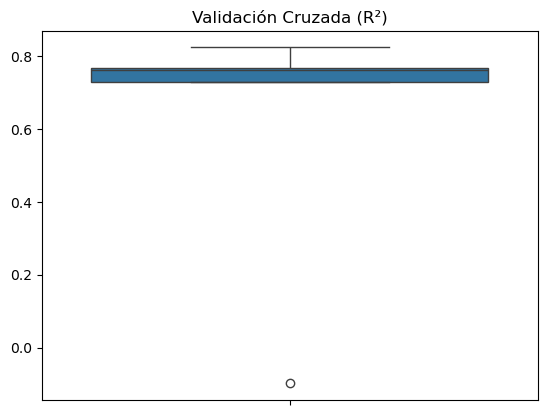

Desviación estándar de los scores: 0.34860097314140304


In [21]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar validación cruzada con 5 pliegues
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Mostrar el resultado de la validación cruzada
sns.boxplot(scores)
plt.title("Validación Cruzada (R²)")
plt.show()

# Mostrar la desviación estándar de los scores
print(f"Desviación estándar de los scores: {np.std(scores)}")

In [22]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Codificar las variables categóricas: Gender, Country, Race
le = LabelEncoder()
smd['Gender'] = le.fit_transform(smd['Gender'])
smd['Country'] = le.fit_transform(smd['Country'].fillna('Unknown'))  # Imputar nulos antes de codificar
smd['Race'] = le.fit_transform(smd['Race'].fillna('Unknown'))  # Imputar nulos antes de codificar

# Seleccionar todas las columnas de X (predictoras) excepto 'Salary' (que es la variable objetivo)
X = smd.drop(columns=['Salary'])

# Convertir cualquier valor no numérico a NaN y luego imputar esos valores
X = X.apply(pd.to_numeric, errors='coerce')  # Convertir las columnas a numéricas
X = X.fillna(0)  # Imputar NaN con 0 (puedes elegir otro valor si es necesario)

# Eliminar cualquier columna que no sea numérica o que tenga valores no válidos
X = X.select_dtypes(include=['number'])

# Verificar que todas las columnas sean numéricas
print(X.dtypes)  # Esto debería mostrar 'float64' o 'int64' para todas las columnas

# Variable objetivo 'Salary' (sin modificaciones)
y = smd['Salary']

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función para realizar la selección hacia adelante (Forward Selection)
def forward_selection(X, y):
    selected_features = []
    remaining_features = list(X.columns)
    best_r2 = 0
    
    while remaining_features:
        best_feature = None
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            if model.rsquared > best_r2:
                best_r2 = model.rsquared
                best_feature = feature
        if best_feature:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
            
    return selected_features

# Realizar la selección hacia adelante
selected_features = forward_selection(X_train, y_train)
print(f"Características seleccionadas: {selected_features}")

Age                      int64
Gender                   int64
Education Level        float64
Years of Experience    float64
Country                  int64
Race                     int64
Senior                   int64
Missing Count            int64
dtype: object
Características seleccionadas: ['Years of Experience', 'Education Level', 'Age', 'Senior', 'Gender', 'Missing Count', 'Country', 'Race']


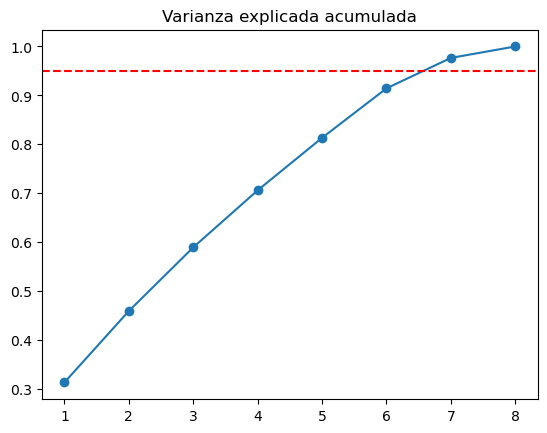

Número de componentes para 95% de varianza: 7


In [23]:
pca = PCA()
X_scaled = scaler.fit_transform(X)  # Estandarizar los datos antes de PCA
pca.fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title("Varianza explicada acumulada")
plt.show()

# Número de componentes para 95% de varianza
num_components = np.argmax(cum_var >= 0.95) + 1
print(f"Número de componentes para 95% de varianza: {num_components}")

In [24]:
X_pca = PCA(n_components=num_components).fit_transform(X_scaled)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
r2_pca = r2_score(y_test, y_pred_pca)
print(f"R² del modelo PCA: {r2_pca}")

R² del modelo PCA: 0.6048208302873224


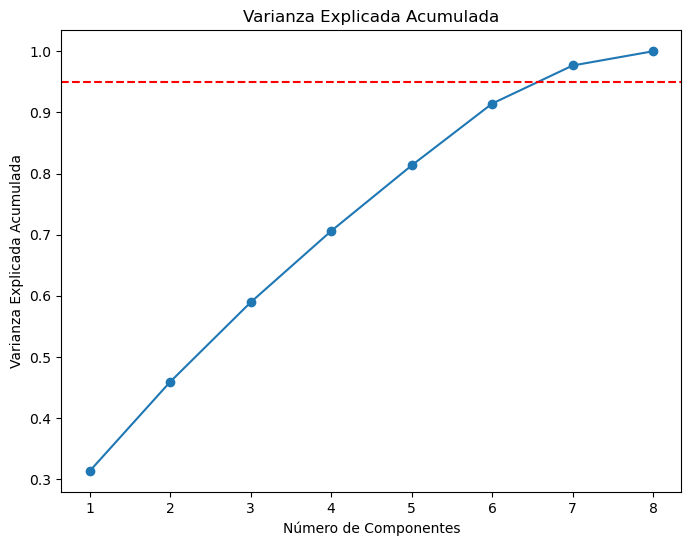

El número de componentes que explican al menos el 95% de la varianza es: 7
El número de componentes seleccionados según el criterio de Kaiser es: 3


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8
Age,0.555173,-0.021292,0.011294,0.027837,-0.080912,-0.180949,-0.483861,-0.645768
Gender,0.074557,0.373579,0.723855,0.065647,-0.510732,0.233609,0.104970,-0.012849
Education Level,0.494875,-0.011605,-0.081887,0.030294,0.034534,-0.198739,0.828279,-0.143547
Years of Experience,0.574638,0.030179,0.011813,0.034676,-0.035106,-0.197150,-0.259124,0.748527
Country,-0.015412,0.464457,-0.418570,0.762001,-0.101237,0.131905,-0.019825,-0.012458
Race,0.013584,0.475591,-0.484687,-0.615942,-0.396893,0.042403,-0.000289,-0.000966
Senior,0.323691,0.069363,-0.024057,-0.136783,0.424662,0.831029,-0.009690,-0.009133
Missing Count,-0.076920,0.642045,0.241580,-0.118557,0.618118,-0.352863,-0.034371,-0.041002


In [25]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Estandarizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Cálculo de la varianza explicada acumulada
cum_var = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada (Scree Plot)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title("Varianza Explicada Acumulada")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.show()

# Número de componentes para el 95% de varianza
num_components_95 = np.argmax(cum_var >= 0.95) + 1
print(f"El número de componentes que explican al menos el 95% de la varianza es: {num_components_95}")

# Criterio de Kaiser: Seleccionar componentes cuyo eigenvalor (varianza explicada) sea mayor a 1
kaiser_criteria = np.sum(pca.explained_variance_ > 1)
print(f"El número de componentes seleccionados según el criterio de Kaiser es: {kaiser_criteria}")

# Cargar los componentes
components_df = pd.DataFrame(pca.components_.T, columns=[f'Factor {i+1}' for i in range(len(pca.components_))], index=X.columns)

# Mostrar la matriz de cargas factoriales
components_df

Cargas factoriales para los 2 primeros factores:
                     Factor 1  Factor 2
Age                  0.555173 -0.021292
Gender               0.074557  0.373579
Education Level      0.494875 -0.011605
Years of Experience  0.574638  0.030179
Country             -0.015412  0.464457
Race                 0.013584  0.475591
Senior               0.323691  0.069363
Missing Count       -0.076920  0.642045

Tabla de comunalidades y unicidades:
                     Comunalidades  Unicidades
Age                       0.308670    0.691330
Gender                    0.145120    0.854880
Education Level           0.245036    0.754964
Years of Experience       0.331120    0.668880
Country                   0.215957    0.784043
Race                      0.226371    0.773629
Senior                    0.109587    0.890413
Missing Count             0.418139    0.581861


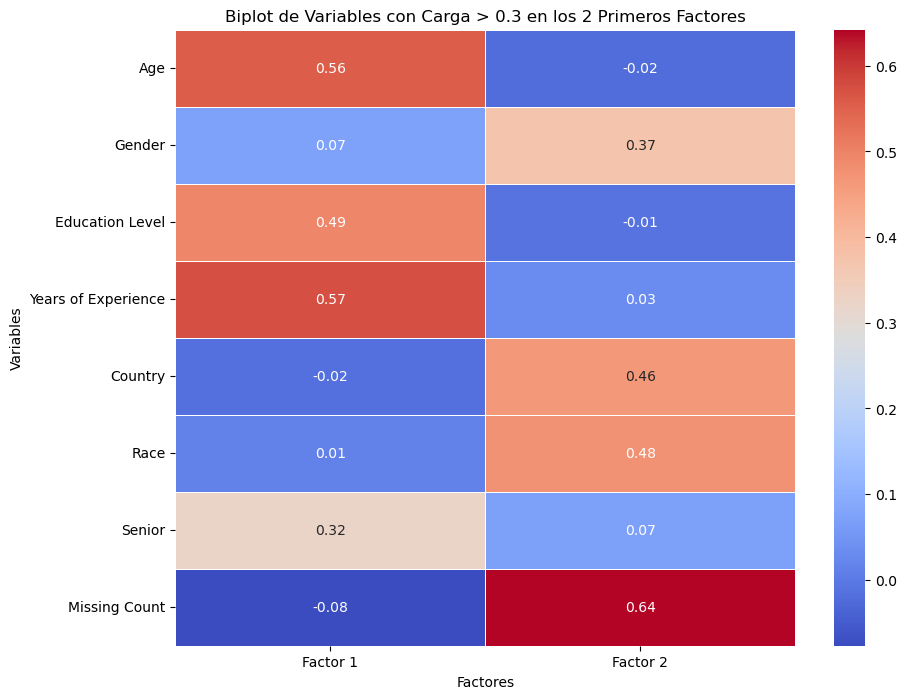

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar PCA con los componentes seleccionados según Kaiser
pca = PCA(n_components=kaiser_criteria)
X_scaled = scaler.fit_transform(X)  # Asegurarse de que los datos estén estandarizados
pca.fit(X_scaled)

# Cargar las componentes en un DataFrame
components_df = pd.DataFrame(pca.components_.T, columns=[f'Factor {i+1}' for i in range(len(pca.components_))], index=X.columns)

# Mostrar las cargas factoriales de los 2 primeros factores
factors_selected = components_df.iloc[:, :2]
print("Cargas factoriales para los 2 primeros factores:")
print(factors_selected)

# Calculando las comunalidades (suma de los cuadrados de las cargas factoriales)
communalities = np.sum(factors_selected**2, axis=1)

# Calculando las unicidades (1 - comunalidad)
unicities = 1 - communalities

# Crear tabla con comunalidades y unicidades
communalities_df = pd.DataFrame({
    "Comunalidades": communalities,
    "Unicidades": unicities
}, index=X.columns)

print("\nTabla de comunalidades y unicidades:")
print(communalities_df)

# Filtrar las variables con cargas mayores a 0.3 en al menos uno de los dos factores
filtered_variables = factors_selected[(factors_selected.abs() > 0.3).any(axis=1)]

# Visualizar el biplot de las variables con cargas > 0.3
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_variables, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Biplot de Variables con Carga > 0.3 en los 2 Primeros Factores")
plt.xlabel("Factores")
plt.ylabel("Variables")
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss, roc_auc_score

# Binarizar la variable objetivo 'Gender' (0 para Female, 1 para Male)
le = LabelEncoder()
smd['Gender'] = le.fit_transform(smd['Gender'])

# Asegurarnos de que 'Gender' solo tenga dos clases (0 y 1)
print(f"Clases en 'Gender': {smd['Gender'].unique()}")  # Verificar las clases

# Si por alguna razón hay más de 2 clases, asegurarnos de que solo haya dos
smd['Gender'] = smd['Gender'].apply(lambda x: 1 if x == 2 else x)  # Asumimos que '2' es un error, lo transformamos a '1'

# Seleccionar las variables predictoras y la variable objetivo
X = smd.drop(columns=['Salary', 'Gender'])
y = smd['Gender']

# Imputar valores faltantes (NaN) con la media de cada columna
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Imputar los valores faltantes

# Normalización y estandarización de las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelado con regresión logística con regularización LASSO
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(X_train, y_train)

# Resultados del entrenamiento
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_

# Predicciones en el conjunto de prueba
y_pred_proba = lasso_model.predict_proba(X_test)[:, 1]

# Calcular el logaritmo de la verosimilitud
log_likelihood = -log_loss(y_test, y_pred_proba) * len(y_test)

# Métricas adicionales
pseudo_r2 = 1 - (lasso_model.score(X_test, y_test))  # Aproximación al Pseudo-R²
aic = 2 * len(coefficients) - 2 * log_likelihood  # Cálculo AIC
bic = len(X_test) * np.log(log_loss(y_test, y_pred_proba)) + np.log(len(X_test)) * len(coefficients)  # Cálculo BIC

# Mostrar los resultados
print(f"Coeficientes del modelo LASSO: {coefficients}")
print(f"Intercepto: {intercept}")
print(f"Logaritmo de la verosimilitud: {log_likelihood}")
print(f"Pseudo-R²: {pseudo_r2}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

# Mostrar las métricas de ROC y AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC (Área bajo la curva ROC): {roc_auc}")

Clases en 'Gender': [1 0 2]
Coeficientes del modelo LASSO: [[ 0.09239933 -0.19261985  0.19815098 -0.01111666 -0.03750575  0.0429121
   0.1167634  -0.01874184  0.01586666 -0.08310249  0.04496234  0.06080322
  -0.00857776 -0.02607275  0.10732245  0.          0.06631944  0.03815055
   0.04473632  0.0439031  -0.06356637 -0.14219289 -0.08285312 -0.06421202
   0.05495308  0.         -0.1722097   0.05118954 -0.05633683  0.05096562
   0.08008509 -0.02191551 -0.05560659  0.          0.1310216   0.
   0.05125377 -0.06246142 -0.00475479 -0.30848509  0.03949575  0.04017748
  -0.03288747  0.05180089  0.05907687 -0.03247454  0.         -0.08276607
  -0.0923726  -0.02368272  0.04301254  0.         -0.06198255  0.05544256
  -0.09782277 -0.15078757  0.09325746 -0.27605363 -0.01112252 -0.17541017
  -0.17372715  0.05191241 -0.0616753  -0.07200773 -0.15785581  0.
  -0.5686234  -0.06744692 -0.37340388 -0.06411888  0.07012448  0.0377483
   0.03911875  0.05034585  0.06563878 -0.11232374 -0.1052288   0.067148

Matriz de Confusión:
[[309 306]
 [144 578]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.68      0.50      0.58       615
           1       0.65      0.80      0.72       722

    accuracy                           0.66      1337
   macro avg       0.67      0.65      0.65      1337
weighted avg       0.67      0.66      0.65      1337

Área bajo la curva (AUC): 0.7345821228295385


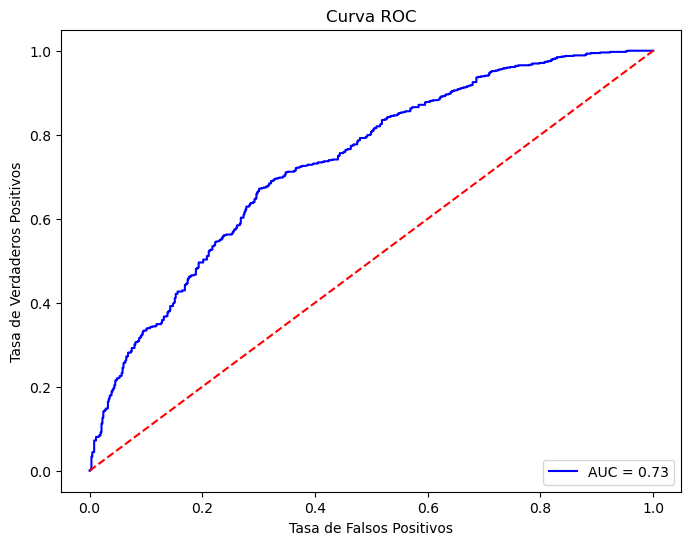


Coeficientes del modelo LASSO:
[ 0.09239933 -0.19261985  0.19815098 -0.01111666 -0.03750575  0.0429121
  0.1167634  -0.01874184  0.01586666 -0.08310249  0.04496234  0.06080322
 -0.00857776 -0.02607275  0.10732245  0.          0.06631944  0.03815055
  0.04473632  0.0439031  -0.06356637 -0.14219289 -0.08285312 -0.06421202
  0.05495308  0.         -0.1722097   0.05118954 -0.05633683  0.05096562
  0.08008509 -0.02191551 -0.05560659  0.          0.1310216   0.
  0.05125377 -0.06246142 -0.00475479 -0.30848509  0.03949575  0.04017748
 -0.03288747  0.05180089  0.05907687 -0.03247454  0.         -0.08276607
 -0.0923726  -0.02368272  0.04301254  0.         -0.06198255  0.05544256
 -0.09782277 -0.15078757  0.09325746 -0.27605363 -0.01112252 -0.17541017
 -0.17372715  0.05191241 -0.0616753  -0.07200773 -0.15785581  0.
 -0.5686234  -0.06744692 -0.37340388 -0.06411888  0.07012448  0.0377483
  0.03911875  0.05034585  0.06563878 -0.11232374 -0.1052288   0.06714883
 -0.06353711 -0.67991769  0.04864327 

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Predicciones del modelo en el conjunto de prueba
y_pred_class = lasso_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_class)
print("Matriz de Confusión:")
print(cm)

# Mostrar el reporte de clasificación (precision, recall, f1-score)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_class))

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"Área bajo la curva (AUC): {roc_auc}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal (no discriminación)
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()

# Interpretación de los coeficientes de la regresión logística
coefficients = lasso_model.coef_.flatten()
print("\nCoeficientes del modelo LASSO:")
print(coefficients)

# Interpretación de los odds para las categorías 'Mixed' de Race y 'Receptionist', 'Front End Developer' de Job Title
categorical_columns = ['Race_Mixed', 'Job Title_Receptionist', 'Job Title_Front End Developer']
odds_ratios = np.exp(coefficients)  # Exponencial de los coeficientes para obtener los odds

# Mostrar los odds ratios para las categorías específicas
for col, coef in zip(categorical_columns, odds_ratios):
    print(f"Odds para {col}: {coef:.2f}")


In [2]:
import pandas as pd

salary_data = pd.read_csv("Salary.csv")

# Mostrar las primeras filas del conjunto de datos
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [3]:
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder para cada variable categórica
le_gender = LabelEncoder()
le_education = LabelEncoder()
le_job_title = LabelEncoder()
le_country = LabelEncoder()
le_race = LabelEncoder()

# Codificar las variables categóricas
salary_data['Gender'] = le_gender.fit_transform(salary_data['Gender'])
salary_data['Education Level'] = le_education.fit_transform(salary_data['Education Level'])
salary_data['Job Title'] = le_job_title.fit_transform(salary_data['Job Title'])
salary_data['Country'] = le_country.fit_transform(salary_data['Country'])
salary_data['Race'] = le_race.fit_transform(salary_data['Race'])

# Mostrar las primeras filas después de la codificación
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,1,1,112,5.0,90000.0,3,9,0
1,28.0,0,2,24,3.0,65000.0,4,5,0
2,45.0,1,3,72,15.0,150000.0,1,9,1
3,36.0,0,1,100,7.0,60000.0,4,5,0
4,52.0,1,2,34,20.0,200000.0,4,1,0


In [4]:
from sklearn.preprocessing import StandardScaler

# Variables numéricas a estandarizar
numerical_columns = ['Age', 'Years of Experience', 'Salary']

# Crear el escalador
scaler = StandardScaler()

# Aplicar la estandarización
salary_data[numerical_columns] = scaler.fit_transform(salary_data[numerical_columns])

# Mostrar las primeras filas después de la estandarización
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,-0.212044,1,1,112,-0.510499,-0.479277,3,9,0
1,-0.738676,0,2,24,-0.842237,-0.952736,4,5,0
2,1.499513,1,3,72,1.148191,0.657025,1,9,1
3,0.314589,0,1,100,-0.178761,-1.047428,4,5,0
4,2.421120,1,2,34,1.977536,1.603944,4,1,0


Matriz de Confusión:
[[208 417]
 [143 569]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.59      0.33      0.43       625
           1       0.58      0.80      0.67       712

    accuracy                           0.58      1337
   macro avg       0.58      0.57      0.55      1337
weighted avg       0.58      0.58      0.56      1337


AUC: 0.6166303370786517


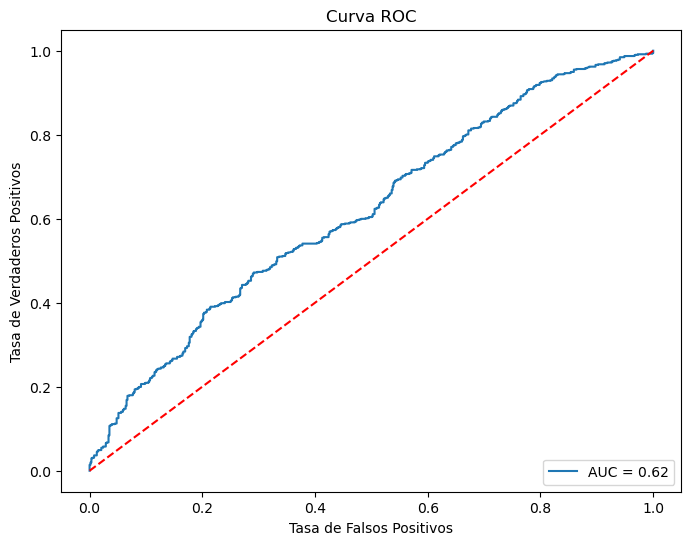

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = salary_data.drop(columns=['Senior', 'Gender'])  # Excluir 'Senior' y 'Gender' del conjunto de predictores
y = salary_data['Gender']

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_class = model.predict(X_test)

# Calcular las métricas: precisión, recall y AUC
cm = confusion_matrix(y_test, y_pred_class)
classification_rep = classification_report(y_test, y_pred_class)

# Calcular AUC (Área Bajo la Curva)
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Mostrar la matriz de confusión y el reporte de clasificación
print("Matriz de Confusión:")
print(cm)

print("\nReporte de Clasificación:")
print(classification_rep)

print(f"\nAUC: {roc_auc}")

# Visualizar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()

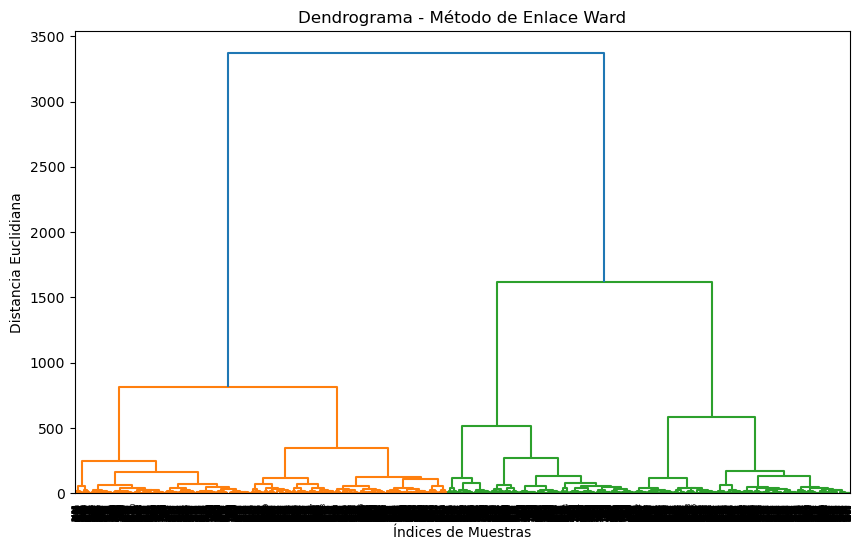

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Seleccionar las características para el clustering (todas excepto 'Senior')
X_clustering = salary_data.drop(columns=['Senior'])

# Aplicar el Clustering Jerárquico Aglomerativo con el enlace 'ward'
clustering_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
salary_data['Cluster_Ward'] = clustering_ward.fit_predict(X_clustering)

# Mostrar el dendrograma para el enlace 'ward'
plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(X_clustering, method='ward'))
plt.title('Dendrograma - Método de Enlace Ward')
plt.xlabel('Índices de Muestras')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Aplicar el Clustering Jerárquico Aglomerativo con el enlace 'complete'
clustering_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
salary_data['Cluster_Complete'] = clustering_complete.fit_predict(X_clustering)

# Mostrar el dendrograma para el enlace 'complete'
plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(X_clustering, method='complete'))
plt.title('Dendrograma - Método de Enlace Complete')
plt.xlabel('Índices de Muestras')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Asegurarnos de que 'X_clustering' está correctamente definido
X_clustering = salary_data.drop(columns=['Senior'])  # Eliminar columnas no relevantes para clustering

# Aplicar el Clustering Jerárquico Aglomerativo con el enlace 'ward'
clustering_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
salary_data['Cluster_Ward'] = clustering_ward.fit_predict(X_clustering)

# Aplicar el Clustering Jerárquico Aglomerativo con el enlace 'complete'
clustering_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
salary_data['Cluster_Complete'] = clustering_complete.fit_predict(X_clustering)

# Mostrar las primeras filas con las nuevas columnas de clusters
print(salary_data.head())

# Paso 2: Agrupar los datos por cada cluster y obtener métricas descriptivas

# Agrupar por Cluster_Ward y obtener las métricas descriptivas
grouped_ward = salary_data.groupby('Cluster_Ward').mean()

# Agrupar por Cluster_Complete y obtener las métricas descriptivas
grouped_complete = salary_data.groupby('Cluster_Complete').mean()

# Mostrar las métricas para cada tipo de cluster
print("\nMétricas para los clusters (Ward):")
print(grouped_ward)

print("\nMétricas para los clusters (Complete):")
print(grouped_complete)

        Age  Gender  Education Level  Job Title  Years of Experience  \
0 -0.212044       1                1        112            -0.510499   
1 -0.738676       0                2         24            -0.842237   
2  1.499513       1                3         72             1.148191   
3  0.314589       0                1        100            -0.178761   
4  2.421120       1                2         34             1.977536   

     Salary  Country  Race  Senior  Cluster_Ward  Cluster_Complete  
0 -0.479277        3     9       0             0                 0  
1 -0.952736        4     5       0             2                 1  
2  0.657025        1     9       1             1                 0  
3 -1.047428        4     5       0             0                 0  
4  1.603944        4     1       0             2                 1  

Métricas para los clusters (Ward):
                   Age    Gender  Education Level   Job Title  \
Cluster_Ward                                        

In [38]:
print("\nMétricas para los clusters (Ward):")
print(grouped_ward)

print("\nMétricas para los clusters (Complete):")
print(grouped_complete)


Métricas para los clusters (Ward):
                   Age    Gender  Education Level   Job Title  \
Cluster_Ward                                                    
0             0.050455  0.614477         1.553588  102.926996   
1            -0.130156  0.388261         1.480345   62.639742   
2             0.049308  0.604478         1.924129   23.753109   

              Years of Experience    Salary   Country      Race    Senior  \
Cluster_Ward                                                                
0                        0.023951  0.000729  1.995651  4.823858  0.225536   
1                       -0.151965 -0.291102  2.042542  4.989768  0.077544   
2                        0.127550  0.334721  1.991915  4.821517  0.055348   

              Cluster_Complete  
Cluster_Ward                    
0                     0.000000  
1                     1.235326  
2                     1.001866  

Métricas para los clusters (Complete):
                       Age    Gender  Education